In [5]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io,color,exposure

In [2]:
def make_correction(channel:np.ndarray,mu:float)->np.ndarray:
    channel=channel/255.0
    channel_mean=channel.mean()
    channel_var=channel.var()
    channel_max=channel_mean+mu*channel_var
    channel_min=channel_mean-mu*channel_var
    channel_corrected=255.0*(channel-channel_min)/(channel_max-channel_min)
    channel_corrected=np.clip(channel_corrected,0,255)
    return channel_corrected.astype(np.uint8)

In [3]:
def get_corrected_image(img:np.ndarray,mu:float)->np.ndarray:
    R,G,B=img[:,:,0],img[:,:,1],img[:,:,2]
    R_corrected,G_corrected,B_corrected=make_correction(R,mu),make_correction(G,mu),make_correction(B,mu)
    corrected_image=np.stack([R_corrected,G_corrected,B_corrected],axis=-1)
    return corrected_image


In [4]:
def RGB2LAB(img:np.ndarray)->tuple[np.ndarray]:
    lab_img=color.rgb2lab(img)
    L,A,B=lab_img[:,:,0],lab_img[:,:,1],lab_img[:,:,2]
    return (L,A,B)

In [6]:
def LAB2RGB(L:np.ndarray,A:np.ndarray,B:np.ndarray)->np.ndarray:
    h,b=A.shape
    LAB_IMAGE=np.zeros(shape=(h,b,3))
    LAB_IMAGE[:,:,0],LAB_IMAGE[:,:,1],LAB_IMAGE[:,:,2]=L,A,B
    image=color.lab2rgb(LAB_IMAGE)
    return image

In [17]:
def image_decomposition(layer:np.ndarray)->list[np.ndarray]:
    red_circles,purple_circles=layer[0::2,1::2],layer[0::2,0::2]
    red_squares,purple_squares=layer[1::2,0::2],layer[1::2,1::2]
    return red_circles,purple_circles,red_squares,purple_squares

In [ ]:
def minimal_projecttion_operator(layer:np.ndarray)->np.ndarray:
    f1=layer

In [10]:
img=io.imread("../images/d_r_1_.jpg")

In [11]:
img.shape

(480, 584, 3)

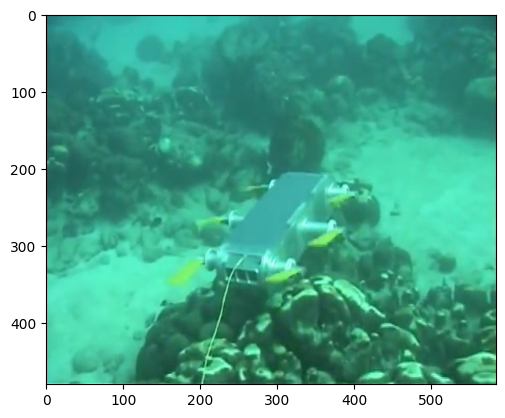

In [12]:
plt.imshow(img)
plt.show()

In [28]:
layer=np.random.randint(low=0,high=10,size=(5,4))

In [29]:
print(layer)

[[0 0 3 0]
 [4 9 7 9]
 [1 8 0 8]
 [3 3 1 5]
 [0 7 5 3]]


In [30]:
a,b,c,d=image_decomposition(layer)

In [31]:
a,b,c,d

(array([[0, 0],
        [8, 8],
        [7, 3]]),
 array([[0, 3],
        [1, 0],
        [0, 5]]),
 array([[4, 7],
        [3, 1]]),
 array([[9, 9],
        [3, 5]]))

In [25]:
print(layer)

[[1 8 3 6]
 [2 7 8 7]
 [1 3 4 7]
 [7 5 8 6]
 [1 0 2 9]]
